## Data Preprocessing

In [35]:
import pandas as pd
import numpy as np

In [36]:
solar_data_2014 = pd.read_csv('/content/Solar_Irradiance_2014.csv')
solar_data_2015 = pd.read_csv('/content/Solar_Irradiance_2015.csv')
solar_data_2016 = pd.read_csv('/content/Solar_Irradiance_2016.csv')
solar_data_2017 = pd.read_csv('/content/Solar_Irradiance_2017.csv')
weather_data = pd.read_csv('/content/Weather.csv')
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [37]:
# Merge and concat all of the solar data from 2014 to 2017
solar_data = pd.concat([solar_data_2014, solar_data_2015, solar_data_2016, solar_data_2017])

In [38]:
# Convert Year, Month, Day, Hour, and Minute columns to a datetime format
solar_data['date_time'] = pd.to_datetime(solar_data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Format the date_time column to 'Jan 1, 2014 7AM' format
solar_data['date_time'] = solar_data['date_time'].dt.strftime('%b %-d, %Y %-I%p')

# Convert AM/PM part to lowercase
solar_data['date_time'] = solar_data['date_time'].str.replace(r'AM|PM', lambda x: x.group(0).lower(), regex=True)

# Drop Year, Month, Day, Hour, and Minute columns
solar_data = solar_data.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1)

solar_data.head()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,date_time
0,0.0,0.0,0.0,0.0,0.0,0.0,Probably Clear,-6,124.02,0.12,3.5,78.43,-3,1010,"Jan 1, 2014 12am"
1,0.0,0.0,0.0,0.0,0.0,0.0,Probably Clear,-5,135.09,0.12,3.8,81.74,-3,1010,"Jan 1, 2014 1am"
2,0.0,0.0,0.0,0.0,0.0,0.0,Probably Clear,-5,145.77,0.12,4.2,81.25,-3,1010,"Jan 1, 2014 2am"
3,0.0,0.0,0.0,0.0,0.0,0.0,Probably Clear,-6,155.07,0.12,4.5,74.14,-3,1010,"Jan 1, 2014 3am"
4,0.0,0.0,0.0,0.0,0.0,0.0,Probably Clear,-8,160.55,0.12,4.6,72.80,-4,1010,"Jan 1, 2014 4am"


In [39]:
# Convert 'date_time' column to date_time format
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], format='%m/%d/%Y %H:%M')

# Format the 'date_time' column to 'Jan 1, 2014 7am' format
weather_data['date_time'] = weather_data['date_time'].dt.strftime('%b %-d, %Y %-I%p')

# Convert AM/PM part to lowercase
weather_data['date_time'] = weather_data['date_time'].str.replace(r'AM|PM', lambda x: x.group(0).lower(), regex=True)

weather_data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,"Jan 1, 2014 12am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,-11,28,3,58,0.0,1022,-4,10,273,20
1,"Jan 1, 2014 1am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,-12,31,4,58,0.0,1023,-5,10,274,22
2,"Jan 1, 2014 2am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,-12,34,5,58,0.0,1024,-5,10,276,25
3,"Jan 1, 2014 3am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,-13,36,6,58,0.0,1024,-5,10,278,27
4,"Jan 1, 2014 4am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,-13,32,9,57,0.0,1025,-6,10,271,23


In [40]:
# Merge the datasets based on the date_time columns
merged_df = pd.merge(weather_data, solar_data, left_on='date_time', right_on='date_time', how='inner')
merged_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,"Jan 1, 2014 12am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,0.0,0.0,Probably Clear,-6,124.02,0.12,3.5,78.43,-3,1010
1,"Jan 1, 2014 1am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,0.0,0.0,Probably Clear,-5,135.09,0.12,3.8,81.74,-3,1010
2,"Jan 1, 2014 2am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,0.0,0.0,Probably Clear,-5,145.77,0.12,4.2,81.25,-3,1010
3,"Jan 1, 2014 3am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,0.0,0.0,Probably Clear,-6,155.07,0.12,4.5,74.14,-3,1010
4,"Jan 1, 2014 4am",-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,7:12 AM,...,0.0,0.0,Probably Clear,-8,160.55,0.12,4.6,72.80,-4,1010


In [41]:
# Rename 'date_time' column in merged_df to 'Timestamp'
merged_df = merged_df.rename(columns={'date_time': 'Timestamp'})
merged_df.isnull().sum()

,0
Timestamp,0
maxtempC,0
mintempC,0
totalSnow_cm,0
sunHour,0
uvIndex,0
moon_illumination,0
moonrise,0
moonset,0
sunrise,0


In [42]:
# Merge the train_df based on the Timestamp columns (left)
merged_train_df = pd.merge(train_data, merged_df, left_on='Timestamp', right_on='Timestamp', how='left')
merged_train_df.head()

,Timestamp,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,...,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,"Jan 1, 2014 7am",0.0079,-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,...,0.0,0.0,Probably Clear,-9,141.17,0.12,4.4,69.95,-5,1020
1,"Jan 1, 2014 8am",0.1019,-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,...,0.0,0.0,Super-Cooled Water,-9,130.24,0.12,4.3,74.24,-6,1020
2,"Jan 1, 2014 9am",0.3932,-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,...,0.0,0.0,Super-Cooled Water,-10,119.14,0.12,4.3,73.07,-6,1020
3,"Jan 1, 2014 10am",0.5447,-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,...,0.0,0.0,Super-Cooled Water,-10,108.20,0.12,4.1,72.43,-6,1020
4,"Jan 1, 2014 11am",0.5485,-3,-6,0.0,8.7,2,1,6:58 AM,5:05 PM,...,0.0,0.0,Probably Clear,-10,97.73,0.12,3.9,72.47,-6,1020


In [43]:
# Merge the test_df based on the Timestamp columns (left)
merged_test_df = pd.merge(test_data, merged_df, left_on='Timestamp', right_on='Timestamp', how='left')
merged_test_df.head()

,Timestamp,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,...,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,"Oct 1, 2017 6am",NaN,21,9,0.0,11.6,5,71,3:26 PM,1:02 AM,...,0.0,0.0,Probably Clear,8,133.20,0.126,2.7,96.31,9,1020
1,"Oct 1, 2017 7am",NaN,21,9,0.0,11.6,5,71,3:26 PM,1:02 AM,...,0.0,0.0,Probably Clear,8,124.69,0.126,2.7,95.77,9,1020
2,"Oct 1, 2017 8am",NaN,21,9,0.0,11.6,5,71,3:26 PM,1:02 AM,...,0.0,0.0,Probably Clear,8,114.68,0.126,2.8,95.30,9,1020
3,"Oct 1, 2017 9am",NaN,21,9,0.0,11.6,5,71,3:26 PM,1:02 AM,...,0.0,0.0,Probably Clear,8,103.89,0.126,2.8,94.95,9,1020
4,"Oct 1, 2017 10am",NaN,21,9,0.0,11.6,5,71,3:26 PM,1:02 AM,...,0.0,0.0,Probably Clear,8,92.80,0.126,2.8,94.59,9,1020


In [46]:
# Drop time-based column on merged_train_df and merged_test_df
merged_train_df = merged_train_df.drop(['Timestamp', 'sunrise', 'sunset', 'moon_illumination', 'moonrise', 'moonset'], axis=1)
merged_test_df = merged_test_df.drop(['Timestamp', 'sunrise', 'sunset', 'moon_illumination', 'moonrise', 'moonset'], axis=1)

In [47]:
# Preprocessed the null datas on merge_train_df and merge_test_df with KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Identify categorical and numerical columns
categorical_cols = merged_train_df.select_dtypes(include=['object']).columns
numerical_cols = merged_train_df.select_dtypes(exclude=['object']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: Index(['Cloud Type'], dtype='object')
Numerical columns: Index(['% Baseline', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'DHI', 'DNI',
       'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Dew Point',
       'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')


In [48]:
# Fill missing values in 'Cloud Type' using forward and backward fill
merged_train_df['Cloud Type'] = merged_train_df['Cloud Type'].fillna(method='ffill').fillna(method='bfill')
merged_test_df['Cloud Type'] = merged_test_df['Cloud Type'].fillna(method='ffill').fillna(method='bfill')

<ipython-input-48-365d2ed11d3a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_train_df['Cloud Type'] = merged_train_df['Cloud Type'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-48-365d2ed11d3a>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_test_df['Cloud Type'] = merged_test_df['Cloud Type'].fillna(method='ffill').fillna(method='bfill')


In [49]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on numerical columns of the training data, including '% Baseline'
numerical_cols = merged_train_df.select_dtypes(exclude=['object']).columns
merged_train_df[numerical_cols] = imputer.fit_transform(merged_train_df[numerical_cols])

# Ensure the same columns are used for the test data, including '% Baseline'
merged_test_df[numerical_cols] = imputer.transform(merged_test_df[numerical_cols])
merged_test_df.drop(columns=['% Baseline'], inplace=True)

In [50]:
# Check for remaining NaN values in both train and test sets
print("NaN values in merged_train_df:\n", merged_train_df.isnull().sum())
print("\nNaN values in merged_test_df:\n", merged_test_df.isnull().sum())

NaN values in merged_train_df:
 % Baseline            0
maxtempC              0
mintempC              0
totalSnow_cm          0
sunHour               0
uvIndex               0
DewPointC             0
FeelsLikeC            0
HeatIndexC            0
WindChillC            0
WindGustKmph          0
cloudcover            0
humidity              0
precipMM              0
pressure              0
tempC                 0
visibility            0
winddirDegree         0
windspeedKmph         0
DHI                   0
DNI                   0
GHI                   0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Surface Albedo        0
Wind Speed            0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

NaN values in merged_test_df:
 maxtempC              0
mintempC              0
totalSnow_cm          0
sunHour               0
uvIndex               0
DewPointC  

In [51]:
merged_test_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,...,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,21.0,9.0,0.0,11.6,5.0,7.0,9.0,11.0,9.0,20.0,...,0.0,0.0,Probably Clear,8.0,133.20,0.126,2.7,96.31,9.0,1020.0
1,21.0,9.0,0.0,11.6,5.0,6.0,11.0,12.0,11.0,17.0,...,0.0,0.0,Probably Clear,8.0,124.69,0.126,2.7,95.77,9.0,1020.0
2,21.0,9.0,0.0,11.6,5.0,6.0,13.0,14.0,13.0,15.0,...,0.0,0.0,Probably Clear,8.0,114.68,0.126,2.8,95.30,9.0,1020.0
3,21.0,9.0,0.0,11.6,5.0,5.0,15.0,15.0,15.0,13.0,...,0.0,0.0,Probably Clear,8.0,103.89,0.126,2.8,94.95,9.0,1020.0
4,21.0,9.0,0.0,11.6,5.0,5.0,17.0,17.0,17.0,9.0,...,0.0,0.0,Probably Clear,8.0,92.80,0.126,2.8,94.59,9.0,1020.0


In [52]:
merged_train_df.head()

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,...,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,0.0079,-3.0,-6.0,0.0,8.7,2.0,-14.0,-13.0,-5.0,-13.0,...,0.0,0.0,Probably Clear,-9.0,141.17,0.12,4.4,69.95,-5.0,1020.0
1,0.1019,-3.0,-6.0,0.0,8.7,2.0,-14.0,-12.0,-5.0,-12.0,...,0.0,0.0,Super-Cooled Water,-9.0,130.24,0.12,4.3,74.24,-6.0,1020.0
2,0.3932,-3.0,-6.0,0.0,8.7,2.0,-14.0,-11.0,-4.0,-11.0,...,0.0,0.0,Super-Cooled Water,-10.0,119.14,0.12,4.3,73.07,-6.0,1020.0
3,0.5447,-3.0,-6.0,0.0,8.7,2.0,-14.0,-10.0,-4.0,-10.0,...,0.0,0.0,Super-Cooled Water,-10.0,108.20,0.12,4.1,72.43,-6.0,1020.0
4,0.5485,-3.0,-6.0,0.0,8.7,2.0,-14.0,-10.0,-3.0,-10.0,...,0.0,0.0,Probably Clear,-10.0,97.73,0.12,3.9,72.47,-6.0,1020.0


<Axes: >

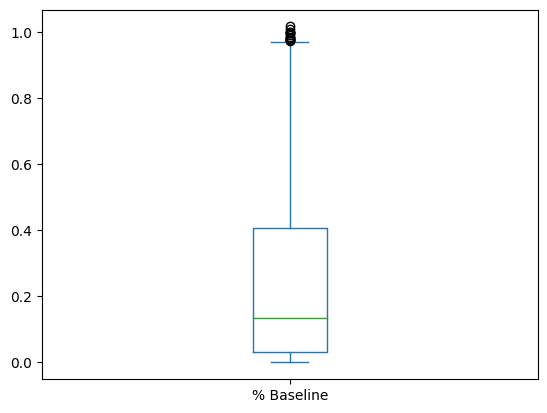

In [53]:
merged_train_df['% Baseline'].plot(kind='box')

In [54]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(merged_df):
  for col_name in list(merged_df.columns):
    if is_numeric_dtype(merged_df[col_name]):
      q1 = merged_df[col_name].quantile(0.25)
      q3 = merged_df[col_name].quantile(0.75)

      iqr = q3 - q1
      upper_bound = q3 + (1.5 * iqr)
      lower_bound = q1 - (1.5 * iqr)

      df_out = merged_df[(merged_df[col_name] >= lower_bound) & (merged_df[col_name] <= upper_bound)]
  return df_out

Dataframe before remove outlier:  (18942, 33)
Dataframe after remove outlier:  (18514, 33)


<Axes: >

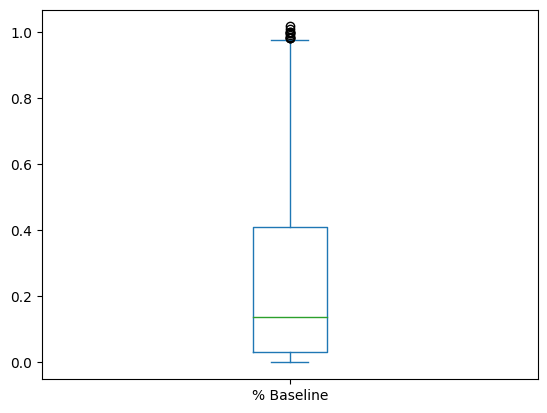

In [55]:
df_clean = remove_outlier(merged_train_df)
print("Dataframe before remove outlier: ", merged_train_df.shape)
print("Dataframe after remove outlier: ", df_clean.shape)
df_clean['% Baseline'].plot(kind='box')

## Data Encoding

In [56]:
# Extract categorical columns
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", cat_cols)

Categorical columns:  ['Cloud Type']


In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform categorical features
encoded_data = encoder.fit_transform(df_clean[cat_cols])

# Create a DataFrame from encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))

# Drop original categorical columns and concatenate encoded features
df_encoded = df_clean.drop(cat_cols, axis=1)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

df_encoded.head()

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,...,Cloud Type_Cirrus,Cloud Type_Clear,Cloud Type_Fog,Cloud Type_Opaque Ice,Cloud Type_Overlapping,Cloud Type_Overshooting,Cloud Type_Probably Clear,Cloud Type_Super-Cooled Water,Cloud Type_Unknown,Cloud Type_Water
0,0.0079,-3.0,-6.0,0.0,8.7,2.0,-14.0,-13.0,-5.0,-13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.1019,-3.0,-6.0,0.0,8.7,2.0,-14.0,-12.0,-5.0,-12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.3932,-3.0,-6.0,0.0,8.7,2.0,-14.0,-11.0,-4.0,-11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5447,-3.0,-6.0,0.0,8.7,2.0,-14.0,-10.0,-4.0,-10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.5485,-3.0,-6.0,0.0,8.7,2.0,-14.0,-10.0,-3.0,-10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
# Transform categorical features in the test set using the fitted encoder
encoded_test_data = encoder.transform(merged_test_df[cat_cols])

# Create a DataFrame from encoded test data
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(cat_cols))

# Drop original categorical columns and concatenate encoded features in the test set
df_test_encoded = merged_test_df.drop(cat_cols, axis=1)
df_test_encoded = pd.concat([df_test_encoded, encoded_test_df], axis=1)

df_test_encoded.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,...,Cloud Type_Cirrus,Cloud Type_Clear,Cloud Type_Fog,Cloud Type_Opaque Ice,Cloud Type_Overlapping,Cloud Type_Overshooting,Cloud Type_Probably Clear,Cloud Type_Super-Cooled Water,Cloud Type_Unknown,Cloud Type_Water
0,21.0,9.0,0.0,11.6,5.0,7.0,9.0,11.0,9.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21.0,9.0,0.0,11.6,5.0,6.0,11.0,12.0,11.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,21.0,9.0,0.0,11.6,5.0,6.0,13.0,14.0,13.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,21.0,9.0,0.0,11.6,5.0,5.0,15.0,15.0,15.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,21.0,9.0,0.0,11.6,5.0,5.0,17.0,17.0,17.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##Data Training

In [62]:
# Prepare train-test-split for the data training
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_encoded_cleaned = df_encoded.dropna()

X = df_encoded_cleaned.drop('% Baseline', axis=1)
y = df_encoded_cleaned['% Baseline']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14468, 41)
X_test shape: (3618, 41)
y_train shape: (14468,)
y_test shape: (3618,)


In [63]:
# Define rmse function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

## Train GSCV

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
rmse_best = rmse(y_test, y_pred_best)
print("Best Model RMSE:", rmse_best)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Model RMSE: 0.10865429397253372


## Testing & Evaluate

In [65]:
test_predictions = best_model.predict(df_test_encoded)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'Timestamp': test_data['Timestamp'],
    '% Baseline': test_predictions
})
submission_df = np.round(submission_df, 4)

In [67]:
submission_df.head()

,Timestamp,% Baseline
0,"Oct 1, 2017 6am",0.0803
1,"Oct 1, 2017 7am",0.0600
2,"Oct 1, 2017 8am",0.1287
3,"Oct 1, 2017 9am",0.3085
4,"Oct 1, 2017 10am",0.4898


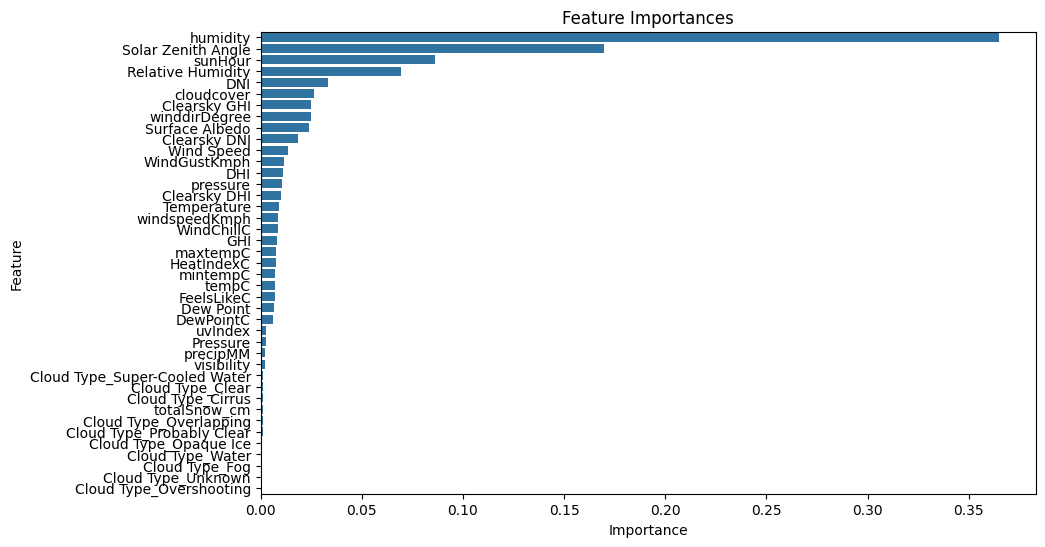

In [69]:
# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for feature importances with column names
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

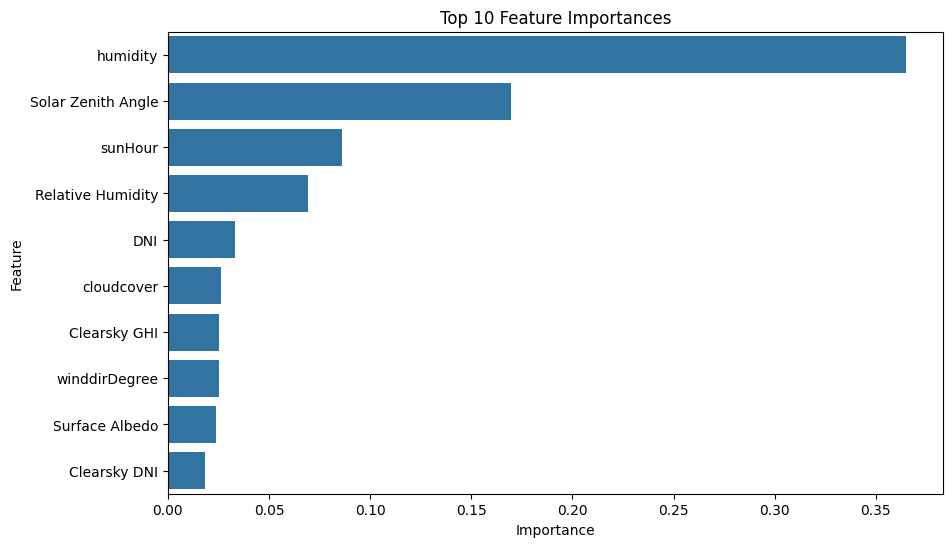

In [94]:
# Select top 10 features
top_10_features = feature_importances_df.head(10)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

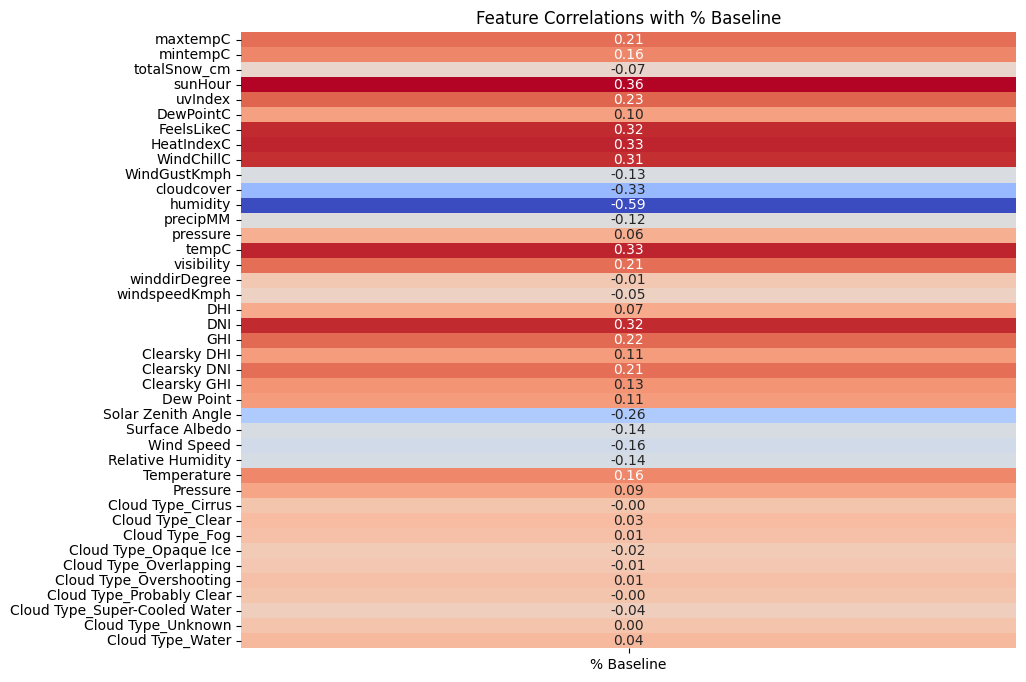

In [96]:
# Calculate the correlation matrix
correlation_matrix = df_encoded_cleaned.corr()

# Extract correlations with '% Baseline'
baseline_correlations = correlation_matrix['% Baseline']

# Remove '% Baseline' from the correlations
baseline_correlations = baseline_correlations.drop('% Baseline')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(baseline_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Feature Correlations with % Baseline')
plt.show()


In [ ]:
# Export to Excel
submission.to_excel('predictions.xlsx', index=False)
files.download('predictions.xlsx')

____
